In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

train = pd.read_csv("../dataset/UNSW_NB15_training-set.csv")
test = pd.read_csv("../dataset/UNSW_NB15_testing-set.csv")

df = pd.concat([train, test]).reset_index(drop=True)
df = df.drop(columns=["id"])
df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,Generic,1
257669,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.98057,3721.068786,120.177727,255,3518776216,3453092386,255,0.09944,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,0,Shellcode,1
257670,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,Generic,1
257671,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,Generic,1


In [100]:
labels = df['label']
x_df = df.drop(columns=['label', 'attack_cat'])

Take top 6 most common categorical features and generalize the rest as '-' category.

In [101]:
cat_cols = x_df.select_dtypes(exclude=[np.number]).columns
x_df[cat_cols].describe()

,proto,service,state
count,257673,257673,257673
unique,133,13,11
top,tcp,-,FIN
freq,123041,141321,117164


In [102]:
for feature in cat_cols:
    if x_df[feature].nunique() > 6:
        x_df[feature] = np.where(x_df[feature].isin(x_df[feature].value_counts().head().index), x_df[feature], '-')

x_df[cat_cols].describe()

,proto,service,state
count,257673,257673,257673
unique,6,5,6
top,tcp,-,FIN
freq,123041,149701,117164


Concatenate one hot encoded categorical features and numerical features, which gives a total of 56 features

In [103]:
num_cols = x_df.select_dtypes(include=[np.number]).columns

x_df = pd.concat([x_df[num_cols], pd.get_dummies(x_df[cat_cols])], axis=1)
x_df

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,proto_-,proto_arp,proto_ospf,proto_tcp,proto_udp,proto_unas,service_-,service_dns,service_ftp-data,service_http,service_smtp,state_-,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,0.000011,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.000008,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.000005,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.000006,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.000010,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
257669,0.505762,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.98057,3721.068786,120.177727,255,3518776216,3453092386,255,0.09944,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
257670,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
257671,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0


In [104]:
# apply clamping
for feature in x_df.columns:
    if x_df[feature].max() > x_df[feature].median() * 10 and x_df[feature].max() > 10:
        x_df[feature] = np.where(x_df[feature] < x_df[feature].quantile(.95), x_df[feature], x_df[feature].quantile(.95))

x_df.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,proto_-,proto_arp,proto_ospf,proto_tcp,proto_udp,proto_unas,service_-,service_dns,service_ftp-data,service_http,service_smtp,state_-,state_CON,state_FIN,state_INT,state_REQ,state_RST
count,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,0.456516,12.327372,9.855747,1668.298689,3219.398486,77959.930882,180.000931,84.754957,5.110515e+07,3.477517e+05,2.180974,2.956693,37.158635,30.909571,1759.611714,234.711374,121.753661,9.945511e+08,9.906237e+08,119.254629,0.046038,0.023652,0.022386,123.076155,109.314292,0.098660,9.679225,9.114517,1.324978,5.658528,4.861627,3.879448,8.051511,0.012819,0.012850,0.098652,6.382822,8.857366,0.014274,0.074571,0.014926,0.012694,0.477508,0.359762,0.060538,0.580973,0.266466,0.020922,0.104827,0.026813,0.000078,0.078138,0.454700,0.451883,0.014875,0.000326
std,0.759088,16.861516,16.471114,3197.276145,8361.316057,106754.703097,102.488268,112.762131,7.666502e+07,9.740522e+05,3.265256,6.008834,61.852646,50.163202,2852.886830,651.083756,127.367443,1.342271e+09,1.338062e+09,127.230477,0.092908,0.053856,0.045771,145.047115,207.972476,0.298205,37.080850,10.058965,0.992300,6.866560,6.864614,5.367192,10.333915,0.116091,0.116421,0.298195,7.084512,10.116552,0.118618,0.262699,0.121257,0.111952,0.499495,0.479932,0.238481,0.493401,0.442111,0.143123,0.306331,0.161537,0.008810,0.268389,0.497945,0.497680,0.121055,0.018052
min,0.000000,1.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,114.000000,0.000000,30.789277,62.000000,0.000000,1.231800e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.004285,4.000000,2.000000,528.000000,178.000000,2955.664893,254.000000,29.000000,7.439423e+05,1.747441e+03,0.000000,0.000000,0.381696,0.007000,0.673637,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [92]:
# from imblearn.over_sampling import SMOTE

# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(x_df, labels)
# (X_res.shape, y_res.shape)

((329346, 56), (329346,))

In [116]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_df.iloc[:, :39] = sc.fit_transform(x_df.iloc[:, :39])

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,proto_-,proto_arp,proto_ospf,proto_tcp,proto_udp,proto_unas,service_-,service_dns,service_ftp-data,service_http,service_smtp,state_-,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,-0.601388,-0.612483,-0.598367,-0.366656,-0.385036,0.121298,0.722026,-0.751628,1.686020,-0.357016,-0.667935,-0.492059,-0.600584,-0.616181,-0.616784,-0.360494,-0.955926,-0.740948,-0.740343,-0.937314,-0.495523,-0.439166,-0.489097,0.861266,-0.525620,-0.330846,-0.261031,-0.707283,0.680262,-0.678438,-0.562542,-0.536492,-0.585598,-0.110419,-0.110372,-0.330832,-0.759803,-0.677838,-0.120335,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,-0.601392,-0.612483,-0.598367,0.029307,-0.385036,0.440638,0.722026,-0.751628,2.811737,-0.357016,-0.667935,-0.492059,-0.600632,-0.616181,-0.616784,-0.360494,-0.955926,-0.740948,-0.740343,-0.937314,-0.495523,-0.439166,-0.489097,3.550052,-0.525620,-0.330846,-0.261031,-0.707283,0.680262,-0.678438,-0.562542,-0.536492,-0.585598,-0.110419,-0.110372,-0.330832,-0.759803,-0.677838,-0.120335,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,-0.601396,-0.612483,-0.598367,-0.187754,-0.385036,1.143184,0.722026,-0.751628,2.811737,-0.357016,-0.667935,-0.492059,-0.600681,-0.616181,-0.616784,-0.360494,-0.955926,-0.740948,-0.740343,-0.937314,-0.495523,-0.439166,-0.489097,2.833043,-0.525620,-0.330846,-0.261031,-0.607869,0.680262,-0.678438,-0.562542,-0.536492,-0.488829,-0.110419,-0.110372,-0.330832,-0.759803,-0.578989,-0.120335,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,-0.601394,-0.612483,-0.598367,-0.240298,-0.385036,0.830941,0.722026,-0.751628,2.811737,-0.357016,-0.667935,-0.492059,-0.600665,-0.616181,-0.616784,-0.360494,-0.955926,-0.740948,-0.740343,-0.937314,-0.495523,-0.439166,-0.489097,2.253919,-0.525620,-0.330846,-0.261031,-0.607869,0.680262,-0.532805,-0.416867,-0.536492,-0.488829,-0.110419,-0.110372,-0.330832,-0.618650,-0.578989,-0.120335,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,-0.601389,-0.612483,-0.598367,0.143154,-0.385036,0.206456,0.722026,-0.751628,2.811737,-0.357016,-0.667935,-0.492059,-0.600600,-0.616181,-0.616784,-0.360494,-0.955926,-0.740948,-0.740343,-0.937314,-0.495523,-0.439166,-0.489097,3.550052,-0.525620,-0.330846,-0.261031,-0.607869,0.680262,-0.532805,-0.416867,-0.536492,-0.488829,-0.110419,-0.110372,-0.330832,-0.618650,-0.578989,-0.120335,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,-0.601390,-0.612483,-0.598367,-0.486133,-0.385036,0.310537,0.722026,-0.751628,-0.005720,-0.357016,-0.667935,-0.492059,-0.600616,-0.616181,-0.616784,-0.360494,-0.955926,-0.740948,-0.740343,-0.937314,-0.495523,-0.439166,-0.489097,-0.455550,-0.525620,-0.330846,-0.261031,1.479825,0.680262,2.671135,2.787980,1.699319,1.543318,-0.110419,-0.110372,-0.330832,2.486722,1.496821,-0.120335,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
257669,0.064875,-0.138029,-0.112667,-0.327873,-0.342698,-0.729958,0.722026,1.483170,-0.666489,-0.351982,-0.055424,-0.325637,0.278751,0.719074,0.687535,-0.175913,1.046159,1.880567,1.840328,1.066927,0.574782,0.245898,0.877393,-0.421079,-0.314053,-0.330846,-0.261031,-0.806697,-0.327500,-0.678438,-0.562542,-0.536492,-0.585598,-0.110419,-0.110372,-0.330832,-0.759803,-0.776686,-0.120335,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
257670,-0.601390,-0.612483,-0.598367,-0.486133,-0.385036,0.310537,0.722026,-0.751628,-0.005720,-0.357016,-0.667935,-0.492059,-0.600616,-0.616181,-0.616784,-0.360494,-0.955926,-0.740948,-0.740343,-0.937314,-0.495523,-0.439166,-0.489097,-0.455550,-0.525620,-0.330846,-0.261031,0.286857,0.680262,-0.387171,-0

Model training

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_df, labels, test_size=.33, random_state=42)

X_val = X_train.iloc[-10000:]
y_val = y_train.iloc[-10000:]

X_train = X_train.iloc[:-10000]
y_train = y_train.iloc[:-10000]

(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

((162640, 56), (85033, 56), (10000, 56), (162640,), (85033,), (10000,))

In [118]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes = (20,20,), 
                      activation='relu', 
                      solver='adam',
                      batch_size=2000,
                      verbose=0).fit(X_train,y_train)

y_predictions = model.predict(X_test) 

In [119]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix

acc = accuracy_score(y_test, y_predictions)

In [120]:
acc

0.9368833276492656

In [125]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [
        layers.Dense(20, activation='relu', input_dim=X_train.shape[1]),
        layers.Dense(20, activation='relu', use_bias=True),
        layers.Dense(1, activation='sigmoid', use_bias=True)
    ]
)

# model = keras.Sequential(
#     [
#         layers.Dense(256, activation='relu', input_dim=X_train.shape[1]),
#         layers.Dense(128, activation='relu', use_bias=True),
#         layers.Dense(128, activation='relu', use_bias=True),
#         layers.Dense(128, activation='relu', use_bias=True),
#         layers.Dense(128, activation='relu', use_bias=True),
#         layers.Dense(1, activation='sigmoid', use_bias=True)
#     ]
# )
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 20)                1140      
                                                                 
 dense_22 (Dense)            (None, 20)                420       
                                                                 
 dense_23 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,581
Trainable params: 1,581
Non-trainable params: 0
_________________________________________________________________


In [126]:
model.compile('adam', loss='binary_crossentropy', metrics='accuracy')
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=2000, shuffle=1000, verbose=2)

Epoch 1/200
82/82 - 4s - loss: 0.3849 - accuracy: 0.8408 - val_loss: 0.2775 - val_accuracy: 0.8713 - 4s/epoch - 53ms/step
Epoch 2/200
82/82 - 4s - loss: 0.2305 - accuracy: 0.8908 - val_loss: 0.2068 - val_accuracy: 0.8960 - 4s/epoch - 50ms/step
Epoch 3/200
82/82 - 4s - loss: 0.1903 - accuracy: 0.9025 - val_loss: 0.1859 - val_accuracy: 0.9002 - 4s/epoch - 50ms/step
Epoch 4/200
82/82 - 4s - loss: 0.1775 - accuracy: 0.9076 - val_loss: 0.1769 - val_accuracy: 0.9062 - 4s/epoch - 50ms/step
Epoch 5/200
82/82 - 4s - loss: 0.1708 - accuracy: 0.9118 - val_loss: 0.1704 - val_accuracy: 0.9116 - 4s/epoch - 50ms/step
Epoch 6/200
82/82 - 4s - loss: 0.1662 - accuracy: 0.9150 - val_loss: 0.1667 - val_accuracy: 0.9148 - 4s/epoch - 50ms/step
Epoch 7/200
82/82 - 4s - loss: 0.1626 - accuracy: 0.9173 - val_loss: 0.1639 - val_accuracy: 0.9157 - 4s/epoch - 45ms/step
Epoch 8/200
82/82 - 4s - loss: 0.1601 - accuracy: 0.9187 - val_loss: 0.1603 - val_accuracy: 0.9186 - 4s/epoch - 45ms/step
Epoch 9/200
82/82 - 4s -

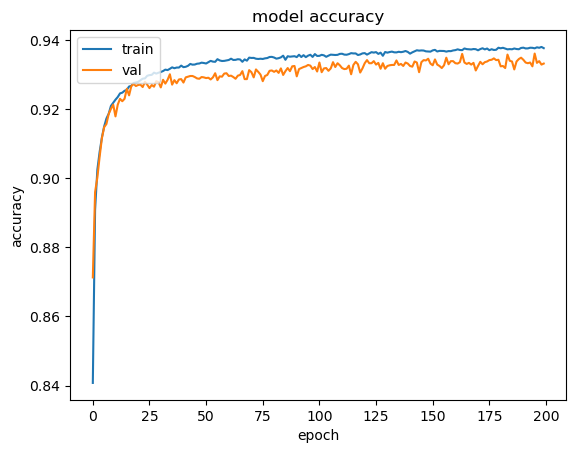

In [127]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

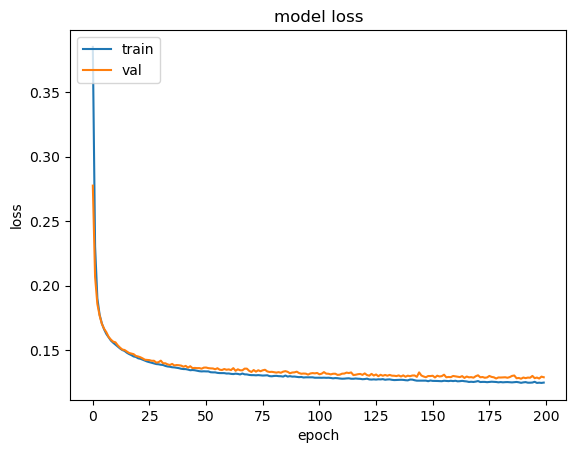

In [128]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [130]:
y_pred = model.predict(X_test)

2658/2658 [==============================] - 2s 769us/step


In [140]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob = self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(model, ['anomaly', 'normal'])


In [139]:
y_pred.argmax(axis=1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [144]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)

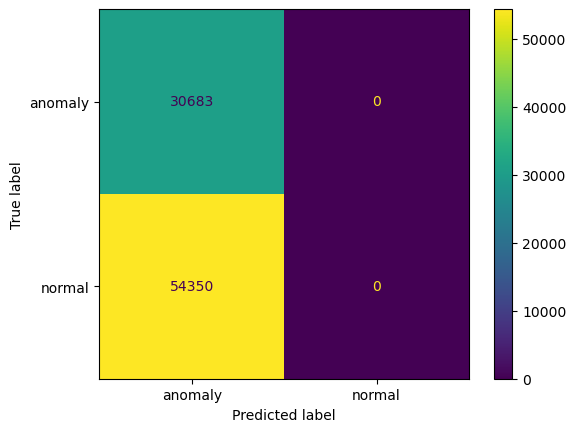

In [145]:
disp.plot()

In [134]:
model.evaluate(X_test, y_test)

2658/2658 [==============================] - 3s 925us/step - loss: 0.1271 - accuracy: 0.9366


[0.1271212100982666, 0.9366363883018494]